In [1]:
import numpy as np 
from library.pdf_estimators import * 
from library.information_continuos import *
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd


df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


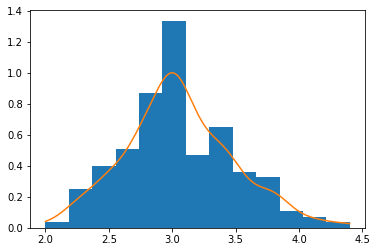

In [2]:
points = kde(df.sepal_width, gaussian)

plt.hist(df.sepal_width, bins='auto', density=True)
plt.plot(np.linspace(df.sepal_width.min(), df.sepal_width.max(), 1000), points)

In [3]:
from scipy.stats import norm

x = np.linspace(-5, 5, 10000)
dxReal = x[1] - x[0]
pdfReal = norm.pdf(x)

n_generated = 10000  # samples number to generate
E_pdf = []
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']

In [16]:
n_sim = 100
results = np.zeros((len(kernels), 3))
# generating the sample
for j, kernel in enumerate(kernels):
    E_pdf = []
    samples = np.random.normal(size=(n_generated, n_sim))
    for i in range(n_sim):
        x, pdfEstimated = kde_sklearn(samples[:, i], kernel)

        dx = x[1] - x[0]

        E_pdf.append(diff_E(pdfEstimated, dx))
    print(f'Fatto Kernel: {kernel}')
    
    results[j, :] = (np.mean(E_pdf), *np.quantile(E_pdf, [0.25, 0.75]))

Fatto Kernel: gaussian
Fatto Kernel: tophat
Fatto Kernel: epanechnikov
Fatto Kernel: exponential
Fatto Kernel: linear
Fatto Kernel: cosine


In [17]:
results

array([[1.42713435, 1.42273533, 1.43137792],
       [1.41977392, 1.41566018, 1.42444973],
       [1.41724865, 1.41252219, 1.42179827],
       [1.43746418, 1.43374854, 1.4415733 ],
       [1.41721776, 1.41365405, 1.42093429],
       [1.41780741, 1.41361816, 1.42236413]])

In [20]:
res = pd.DataFrame({'Kernel': kernels, 'Mean Entropy': results[:, 0], 
                    'q1 Entropy': results[:, 1], 'q2 Entropy': results[:, 2]})

In [23]:
res.to_csv('continuos_entropy_kernels.csv',index=None)

In [25]:
res

,Kernel,Mean Entropy,q1 Entropy,q2 Entropy
0,gaussian,1.427134,1.422735,1.431378
1,tophat,1.419774,1.415660,1.424450
2,epanechnikov,1.417249,1.412522,1.421798
3,exponential,1.437464,1.433749,1.441573
4,linear,1.417218,1.413654,1.420934
5,cosine,1.417807,1.413618,1.422364


In [26]:
res['Mean Entropy'] - diff_E(pdfReal, dxReal)

0    0.008204
1    0.000844
2   -0.001682
3    0.018534
4   -0.001713
5   -0.001123
Name: Mean Entropy, dtype: float64